 # $\eta$ =  2 , d = 1, T = 1, N =300, v = 0.03, L = 7, t = 1 without periodic boundary conditions(PBC)

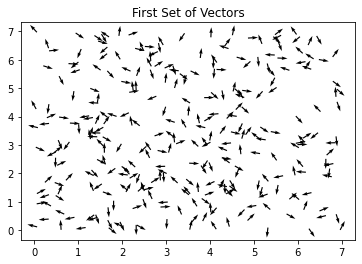

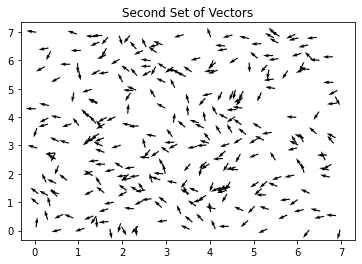

In [7]:

import numpy as np
import matplotlib.pyplot as plt

v =  0.03
N = 300
eta = 2
d = 1
t = 1
L = 7

xi = np.random.randint(7, size=(N))
xf = np.random.rand(N)
x = np.add(xi,xf)
yi = np.random.randint(7, size=(N))
yf = np.random.rand(N)
y = np.add(yi,yf)

theta = np.random.uniform(low = 0, high = 2*np.pi, size = N)
vx = []
vy = [] 
vv = [] #velocity vector - vv
r = []# position
for i in range(N):
    vx.append(v*np.cos(theta[i]))
    vy.append(v*np.sin(theta[i]))
    vv.append([v*np.cos(theta[i]),v*np.sin(theta[i])])
    r.append([x[i],y[i]])


# Plot the first set of vectors
plt.figure()
plt.quiver(x, y, vx, vy, scale=1)
plt.title('First Set of Vectors')

theta_avg = [] # array to store theta averages
for i in range(N):
    ic = []  # index counter
    t_a = 0  # theta average
    for j in range(N):
        if j != i:
            # Calculate the squared Euclidean distance
            squared_distance = (x[j] - x[i])**2 + (y[j] - y[i])**2
            # Take the square root to get the Euclidean distance
            distance = np.sqrt(squared_distance)
            if distance <= d:
                ic.append(j)
    if ic:  # Check if ic is not empty
        for k in range(len(ic)):
            t_a += theta[ic[k]]
        t_a = t_a / len(ic)
    else:
        # If ic is empty, set the average to some default value or handle it as needed
        t_a = theta[i]  # For example, setting it to zero
    theta_avg.append(t_a)
delta_theta = np.random.uniform(low = -eta/2, high = eta/2, size = N)

theta_ = np.add(theta_avg, delta_theta)

x_ = []
y_ = []

for i in range(N):
    x_.append(x[i]+vx[i]*t)
    y_.append(y[i]+vy[i]*t)
    
vx_ = []
vy_ = []
for i in range(N):
    vx_.append(v*np.cos(theta_[i]))
    vy_.append(v*np.sin(theta_[i]))
    
# Plot the second set of vectors
plt.figure()
plt.quiver(x_, y_, vx_, vy_, scale=1)
plt.title('Second Set of Vectors')

plt.show()

# same thing but just in one plot

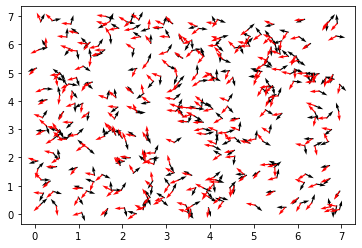

In [38]:
import numpy as np
import matplotlib.pyplot as plt

v = 0.03
N = 300
eta = 2
d = 1
t = 1
L = 7
xi = np.random.randint(L, size=(N))
xf = np.random.rand(N)
x = np.add(xi, xf)
yi = np.random.randint(L, size=(N))
yf = np.random.rand(N)
y = np.add(yi, yf)
x = x.tolist()

theta = np.random.uniform(low=0, high=2*np.pi, size=N)
vx = []
vy = []
vv = []  # velocity vector - vv
r = []  # position
for i in range(N):
    vx.append(v*np.cos(theta[i]))
    vy.append(v*np.sin(theta[i]))
    vv.append([v*np.cos(theta[i]), v*np.sin(theta[i])])
    r.append([x[i], y[i]])

# Plot the first set of vectors
plt.quiver(x, y, vx, vy, scale=1)

theta_avg = []  # array to store theta averages
for i in range(N):
    ic = []  # index counter
    t_a = 0  # theta average
    for j in range(N):
        if j != i:
            # Calculate the squared Euclidean distance
            squared_distance = (x[j] - x[i])**2 + (y[j] - y[i])**2
            # Take the square root to get the Euclidean distance
            distance = np.sqrt(squared_distance)
            if distance <= d:
                ic.append(j)
    if ic:  # Check if ic is not empty
        for k in range(len(ic)):
            t_a += theta[ic[k]]
        t_a = t_a / len(ic)
    else:
        # If ic is empty, set the average to some default value or handle it as needed
        t_a = theta[i]  # For example, setting it to zero
    theta_avg.append(t_a)

delta_theta = np.random.uniform(low=-eta/2, high=eta/2, size=N)
theta_ = np.add(theta_avg, delta_theta)

x_ = []
y_ = []

for i in range(N):
    x_.append(x[i]+vx[i]*t)
    y_.append(y[i]+vy[i]*t)

vx_ = []
vy_ = []
for i in range(N):
    vx_.append(v*np.cos(theta_[i]))
    vy_.append(v*np.sin(theta_[i]))

# Plot the second set of vectors
plt.quiver(x_, y_, vx_, vy_, scale=1,color ='r')

plt.show()

# Vicsek Model

In [29]:
def vicsek_model(L, eta):
    xi = np.random.randint(L, size=(N))
    xf = np.random.rand(N)
    x = np.add(xi,xf)
    yi = np.random.randint(L, size=(N))
    yf = np.random.rand(N)
    y = np.add(yi,yf)

    theta = np.random.uniform(low = 0, high = 2*np.pi, size = N)
    vx = []
    vy = [] 
    vv = [] #velocity vector - vv
    r = []# position
    for i in range(N):
        vx.append(v*np.cos(theta[i]))
        vy.append(v*np.sin(theta[i]))
        vv.append([v*np.cos(theta[i]),v*np.sin(theta[i])])
        r.append([x[i],y[i]])


    #periodic boundary conditions
    def pbc(array, index):
        array_size =len(array)
        if index < 0:
            index = array_size + (index%array_size)
        elif index>= array_size:
            index = index%array_size
        return array[index]

    # Plot the first set of vectors

    plt.figure()
    plt.quiver(x, y, vx, vy, scale=1)
    plt.title('First Set of Vectors')

    for p in range(100):
        theta_avg = [] # array to store theta averages
        for i in range(N):
            ic = []  # index counter
            t_a = 0  # theta average
            for j in range(N):
                if j != i:
                    if x[i]<d and x[j]>(L-(d-x[i])):
                        distance = np.sqrt((x[j]-L - x[i])**2 + (y[j] - y[i])**2)
                        if distance <= d:
                            ic.append(j)
                    elif x[i]>L-d and x[j]<(d+x[i])-L:
                        distance = np.sqrt((x[j]+L - x[i])**2 + (y[j] - y[i])**2)
                        if distance <= d:
                            ic.append(j)
                    else :
                        distance = np.sqrt((x[j] - x[i])**2 + (y[j] - y[i])**2)
                        if distance <= d:
                            ic.append(j)

            if ic:  # Check if ic is not empty
                for k in range(len(ic)):
                    t_a += theta[ic[k]]
                t_a = t_a / len(ic)
            else:
                # If ic is empty, set the average to some default value or handle it as needed
                t_a = theta[i]  # For example, setting it to zero
            theta_avg.append(t_a)
        delta_theta = np.random.uniform(low = -eta/2, high = eta/2, size = N)

        theta = np.add(theta_avg, delta_theta)

        x1 = []
        y1 = []

        for i in range(N):
            x1.append(x[i]+vx[i]*t)
            y1.append(y[i]+vy[i]*t)

        vx1 = []
        vy1 = []
        for i in range(N):
            vx1.append(v*np.cos(theta[i]))
            vy1.append(v*np.sin(theta[i]))
        x = x1
        y = y1
        vx = vx1
        vy = vy1
    # Plot the second set of vectors
    plt.figure()
    plt.quiver(x, y, vx, vy, scale=1)
    plt.title('Second Set of Vectors')

    plt.show()

# $\eta$ = 2,  L = 7, T = 100

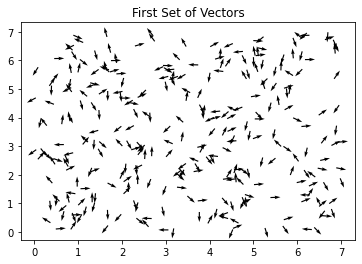

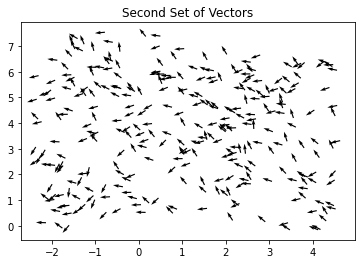

In [30]:
import numpy as np
import matplotlib.pyplot as plt

v =  0.03
N = 300
eta = 2
d = 1
t = 1
L = 7

vicsek_model(L, eta)

# T = 100, L = 25, $\eta$ = 2 

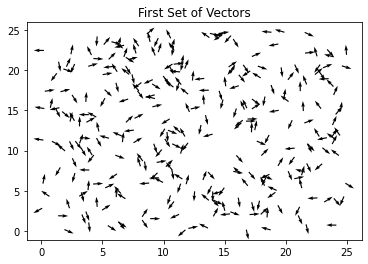

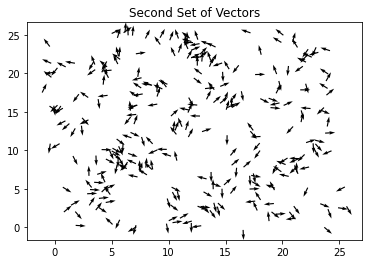

In [23]:
import numpy as np
import matplotlib.pyplot as plt

v =  0.03
N = 300
eta = 2
d = 1
t = 1
L = 25

vicsek_model(L, eta)

# T = 100, L = 25, $\eta$ = 0.1

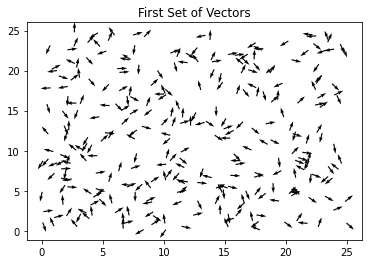

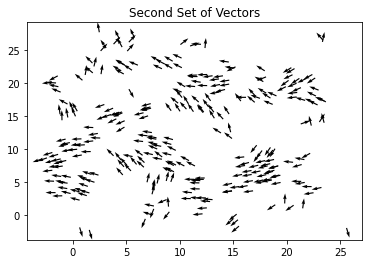

In [24]:
import numpy as np
import matplotlib.pyplot as plt

v =  0.03
N = 300
eta = 0.1
d = 1
t = 1
L = 25

vicsek_model(L, eta)

#  L = 5, $\eta$ = 0.1, T = 100

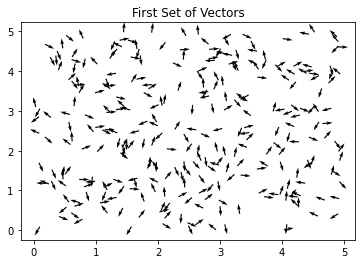

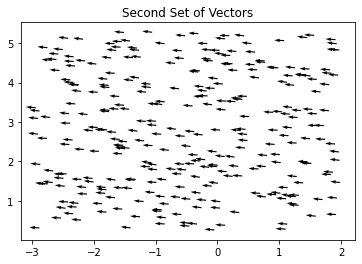

In [25]:

import numpy as np
import matplotlib.pyplot as plt

v =  0.03
N = 300
eta = 0.1
d = 1
t = 1
L = 5

vicsek_model(L, eta)

# Working with same Density

In [32]:



def vicsek_model_2(L, eta):
    xi = np.random.randint(L, size=(N))
    xf = np.random.rand(N)
    x = np.add(xi,xf)
    yi = np.random.randint(L, size=(N))
    yf = np.random.rand(N)
    y = np.add(yi,yf)

    theta = np.random.uniform(low = 0, high = 2*np.pi, size = N)
    vx = []
    vy = [] 
    vv = [] #velocity vector - vv
    r = []# position
    for i in range(N):
        vx.append(v*np.cos(theta[i]))
        vy.append(v*np.sin(theta[i]))
        vv.append([v*np.cos(theta[i]),v*np.sin(theta[i])])
        r.append([x[i],y[i]])


    for p in range(20):
        theta_avg = [] # array to store theta averages
        for i in range(N):
            ic = []  # index counter
            t_a = 0  # theta average
            for j in range(N):
                if j != i:
                    if x[i]<d and x[j]>(L-(d-x[i])):
                        distance = np.sqrt((x[j]-L - x[i])**2 + (y[j] - y[i])**2)
                        if distance <= d:
                            ic.append(j)
                    elif x[i]>L-d and x[j]<(d+x[i])-L:
                        distance = np.sqrt((x[j]+L - x[i])**2 + (y[j] - y[i])**2)
                        if distance <= d:
                            ic.append(j)
                    else :
                        distance = np.sqrt((x[j] - x[i])**2 + (y[j] - y[i])**2)
                        if distance <= d:
                            ic.append(j)

            if ic:  # Check if ic is not empty
                for k in range(len(ic)):
                    t_a += theta[ic[k]]
                t_a = t_a / len(ic)
            else:
                # If ic is empty, set the average to some default value or handle it as needed
                t_a = theta[i]  # For example, setting it to zero
            theta_avg.append(t_a)
        delta_theta = np.random.uniform(low = -eta/2, high = eta/2, size = N)

        theta = np.add(theta_avg, delta_theta)

        x1 = []
        y1 = []

        for i in range(N):
            x1.append(x[i]+vx[i]*t)
            y1.append(y[i]+vy[i]*t)

        vx1 = []
        vy1 = []
        for i in range(N):
            vx1.append(v*np.cos(theta[i]))
            vy1.append(v*np.sin(theta[i]))
        x = x1
        y = y1
        vx = vx1
        vy = vy1
    return(x, y, vx, vy)

KeyboardInterrupt: 

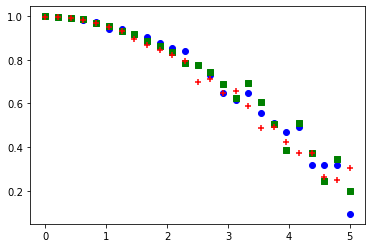

In [55]:
N0 = 300
L0 = 5
ro = N0/L0**2
v = 0.03
d = 1
t = 1

N_  = [40,100,400,4000,10000]
eta_ = np.linspace(0,5,25)
mark = ['o','s','+','x','D']
col = ['b','g','r','c','y']
for i in range(len(N_)):
    L = np.sqrt(N_[i]/ro)
    N = N_[i]
    va = []
    for j in range(len(eta_)):
        eta = eta_[j]
        x, y, vx, vy = vicsek_model_2(L, eta)
        va_x = 0
        va_y = 0
        for k in range(len(vx)):
            va_x += vx[k]
            va_y += vy[k]
        va_ = np.sqrt(va_x**2 + va_y**2)/(N*v)
        va.append(va_)
    plt.scatter(eta_,va,marker=mark[i],color=col[i])

plt.xlabel('$\eta$')
plt.ylabel('va')
plt.legend(f'N = {value}' for value in [40, 100, 400, 4000, 10000])


/tmp/ipykernel_4516/2836142536.py:18: RuntimeWarning: invalid value encountered in double_scalars
  va_ = np.sqrt(va_x**2 + va_y**2)/(N*v)


Text(0, 0.5, 'va')

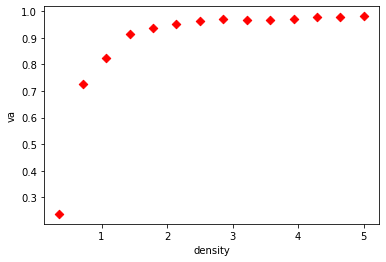

In [63]:
L= 20
v = 0.03
d = 1
t = 1
eta = 0.5

ro = np.linspace(0,5,15)

va = []
for j in range(len(ro)):
    N = int(ro[j]*(L**2))
    x, y, vx, vy = vicsek_model_2(L, eta)
    va_x = 0
    va_y = 0
    for k in range(len(vx)):
        va_x += vx[k]
        va_y += vy[k]
    va_ = np.sqrt(va_x**2 + va_y**2)/(N*v)
    va.append(va_)

plt.scatter(ro,va,marker='D',color='r')

plt.xlabel('density')
plt.ylabel('va')
